In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [79]:
features=pd.read_csv('Features data set.csv')
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [80]:
stores=pd.read_csv('stores data-set.csv')
sales=pd.read_csv('sales data-set.csv')

In [81]:
features['Date'] = pd.to_datetime(features['Date'])
sales['Date'] = pd.to_datetime(sales['Date'])

In [82]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-12-02,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-05-03,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [83]:
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-05-02,24924.50,False
1,1,1,2010-12-02,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-05-03,21827.90,False


In [84]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [85]:
print(features.columns)
print(stores.columns)
print(sales.columns)


Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')
Index(['Store', 'Type', 'Size'], dtype='object')
Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')


In [86]:
print(features.shape)
print(sales.shape)
print(stores.shape)

(8190, 12)
(421570, 5)
(45, 3)


In [87]:
df=pd.merge(sales,features, on=['Store','Date', 'IsHoliday'], how='inner')
df=pd.merge(df,stores, on=['Store'], how='inner')
df
df.isna().mean()*100

Store            0.000000
Dept             0.000000
Date             0.000000
Weekly_Sales     0.000000
IsHoliday        0.000000
Temperature      0.000000
Fuel_Price       0.000000
MarkDown1       64.257181
MarkDown2       73.611025
MarkDown3       67.480845
MarkDown4       67.984676
MarkDown5       64.079038
CPI              0.000000
Unemployment     0.000000
Type             0.000000
Size             0.000000
dtype: float64

In [88]:
df.to_csv('df.csv')

In [37]:
import seaborn as sns

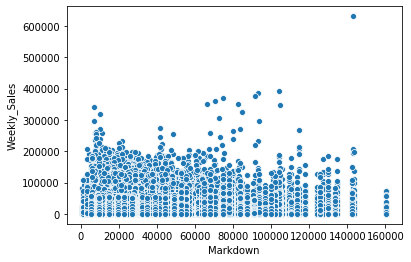

In [43]:
sns.scatterplot(df['Markdown'],df['Weekly_Sales'])

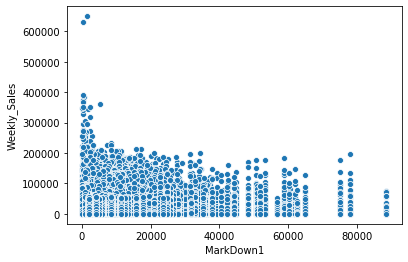

In [44]:
sns.scatterplot(df['MarkDown1'],df['Weekly_Sales'])

In [46]:
le=LabelEncoder()
df['IsHoliday']=le.fit_transform(df['IsHoliday'])
df['Type']=le.fit_transform(df['Type'])
df['Temperature'] = (df['Temperature']- 32) * 5./9.
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Markdown
0,1,1,2010-05-02,24924.50,0,-14.595679,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,151315,NaN
1,1,2,2010-05-02,50605.27,0,-14.595679,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,151315,NaN
2,1,3,2010-05-02,13740.12,0,-14.595679,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,151315,NaN
3,1,4,2010-05-02,39954.04,0,-14.595679,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,151315,NaN
4,1,5,2010-05-02,32229.38,0,-14.595679,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,151315,NaN
5,1,6,2010-05-02,5749.03,0,-14.595679,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,151315,NaN
6,1,7,2010-05-02,21084.08,0,-14.595679,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,151315,NaN
7,1,8,2010-05-02,40129.01,0,-14.595679,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,151315,NaN
8,1,9,2010-05-02,16930.99,0,-14.595679,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,151315,NaN
9,1,10,2010-05-02,30721.50,0,-14.595679,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,151315,NaN


In [48]:
df['Markdown']=df['MarkDown1']+df['MarkDown2']+df['MarkDown3']+df['MarkDown4']+df['MarkDown5']

In [49]:
df.isna().mean()

Store           0.000000
Dept            0.000000
Date            0.000000
Weekly_Sales    0.000000
IsHoliday       0.000000
Temperature     0.000000
Fuel_Price      0.000000
MarkDown1       0.642572
MarkDown2       0.736110
MarkDown3       0.674808
MarkDown4       0.679847
MarkDown5       0.640790
CPI             0.000000
Unemployment    0.000000
Type            0.000000
Size            0.000000
Markdown        0.769775
dtype: float64

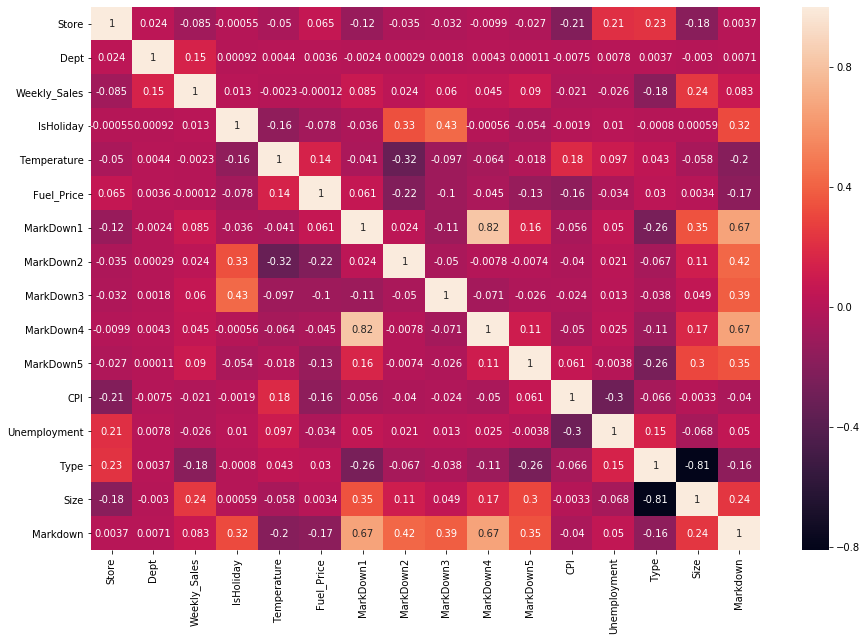

In [50]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,10))
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

In [51]:
df=df.fillna(0)
df['Temperature'] = (df['Temperature']- 32) * 5./9.
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Markdown
0,1,1,2010-05-02,24924.50,0,-25.886488,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0,151315,0.00
1,1,2,2010-05-02,50605.27,0,-25.886488,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0,151315,0.00
2,1,3,2010-05-02,13740.12,0,-25.886488,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0,151315,0.00
3,1,4,2010-05-02,39954.04,0,-25.886488,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0,151315,0.00
4,1,5,2010-05-02,32229.38,0,-25.886488,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0,151315,0.00
5,1,6,2010-05-02,5749.03,0,-25.886488,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0,151315,0.00
6,1,7,2010-05-02,21084.08,0,-25.886488,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0,151315,0.00
7,1,8,2010-05-02,40129.01,0,-25.886488,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0,151315,0.00
8,1,9,2010-05-02,16930.99,0,-25.886488,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0,151315,0.00
9,1,10,2010-05-02,30721.50,0,-25.886488,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0,151315,0.00


In [52]:
df['Weekly_Sales']=df['Weekly_Sales'].abs()

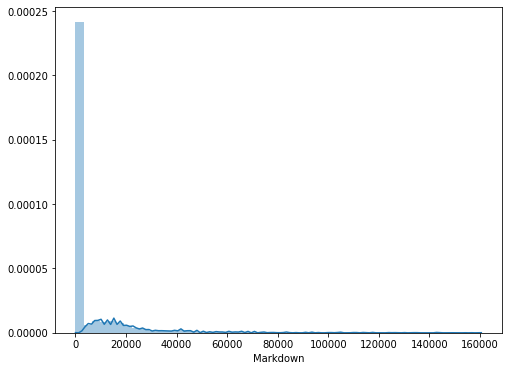

In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.distplot(df['Markdown'])

In [55]:
import statsmodels.api as sm

In [58]:
x=df.drop(['Date',"Weekly_Sales"],1)
y=df['Weekly_Sales']
x_constant=sm.add_constant(x)
x_constant.head()

,const,Store,Dept,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Markdown
0,1.0,1,1,0,-25.886488,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,151315,0.0
1,1.0,1,2,0,-25.886488,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,151315,0.0
2,1.0,1,3,0,-25.886488,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,151315,0.0
3,1.0,1,4,0,-25.886488,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,151315,0.0
4,1.0,1,5,0,-25.886488,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,151315,0.0


In [59]:
model=sm.OLS(y,x_constant).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     2681.
Date:                Thu, 28 Nov 2019   Prob (F-statistic):               0.00
Time:                        14:57:57   Log-Likelihood:            -4.8076e+06
No. Observations:              421570   AIC:                         9.615e+06
Df Residuals:                  421554   BIC:                         9.615e+06
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         8962.9399    570.500     15.711      0.000    7844.778    1.01e+04
Store          -93.6122      2.780    -33.678      0.000     -99.060     -88.164
Dept           111.4348      1.096    101.636      0.000     109.286     113.584
IsHoliday      696.0670    140.497      4.954      0.000     420.696     971.438
Temperature    156.6473     11.431     13.704      0.000     134.244     179.051
Fuel_Price    -663.9535     81.915     -8.105      0.000    -824.504    -503.403
MarkDown1       -0.0056      0.012     -0.454      0.650      -0.030       0.019
MarkDown2        0.0130      0.011      1.208      0.227      -0.008       0.034
MarkDown3        0.1235      0.010     12.977      0.000       0.105       0.142
MarkDown4        0.0431      0.019      2.269      0.023       0.006       0.080
MarkDown5        0.1012      0.011      9.485      0.000       0.080       0.122
CPI            -22.3412      0.957    -23.351      0.000     -24.216     -20.466
Unemployment  -207.4981     19.707    -10.529      0.000    -246.123    -168.873
Type          1897.7585     87.791     21.617      0.000    1725.691    2069.826
Size             0.1029      0.001    107.806      0.000       0.101       0.105
Markdown        -0.0115      0.008     -1.519      0.129      -0.026       0.003
==============================================================================
Omnibus:                   296360.820   Durbin-Watson:                   1.317
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8773264.497
Skew:                           3.022   Prob(JB):                         0.00
Kurtosis:                      24.516   Cond. No.                     2.57e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.57e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
model=sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           Weekly_Sales   R-squared (uncentered):                   0.389
Model:                            OLS   Adj. R-squared (uncentered):              0.389
Method:                 Least Squares   F-statistic:                          1.790e+04
Date:                Thu, 28 Nov 2019   Prob (F-statistic):                        0.00
Time:                        14:58:57   Log-Likelihood:                     -4.8077e+06
No. Observations:              421570   AIC:                                  9.615e+06
Df Residuals:                  421555   BIC:                                  9.616e+06
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Store          -91.5291      2.777    -32.957      0.000     -96.972     -86.086
Dept           112.9202      1.093    103.346      0.000     110.779     115.062
IsHoliday      660.6158    140.520      4.701      0.000     385.200     936.031
Temperature     39.2254      8.651      4.534      0.000      22.269      56.181
Fuel_Price     158.6740     63.013      2.518      0.012      35.170     282.178
MarkDown1       -0.0279      0.012     -2.262      0.024      -0.052      -0.004
MarkDown2        0.0012      0.011      0.113      0.910      -0.020       0.022
MarkDown3        0.1177      0.010     12.375      0.000       0.099       0.136
MarkDown4        0.0540      0.019      2.845      0.004       0.017       0.091
MarkDown5        0.0898      0.011      8.440      0.000       0.069       0.111
CPI            -13.0384      0.752    -17.344      0.000     -14.512     -11.565
Unemployment   -70.8592     17.689     -4.006      0.000    -105.529     -36.189
Type          2203.0704     85.638     25.725      0.000    2035.223    2370.918
Size             0.1072      0.001    116.992      0.000       0.105       0.109
Markdown        -0.0090      0.008     -1.194      0.233      -0.024       0.006
==============================================================================
Omnibus:                   295788.307   Durbin-Watson:                   1.317
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8727565.799
Skew:                           3.014   Prob(JB):                         0.00
Kurtosis:                      24.460   Cond. No.                     6.31e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size', 'Markdown'],
      dtype='object')

In [75]:

df.drop(['MarkDown2'],axis=1,inplace =True)
df.drop(['MarkDown3'],axis=1,inplace =True)
df.drop(['MarkDown4'],axis=1,inplace =True)
df.drop(['MarkDown5'],axis=1,inplace =True)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 12 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null datetime64[ns]
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null int64
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
Type            421570 non-null int64
Size            421570 non-null int64
Markdown        421570 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(5)
memory usage: 61.8 MB


In [77]:
x1=df.drop(['Date',"Weekly_Sales"],1)
y1=df['Weekly_Sales']
x_constant1=sm.add_constant(x1)
x_constant1.head()

,const,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Markdown
0,1.0,1,1,0,-25.886488,2.572,211.096358,8.106,0,151315,0.0
1,1.0,1,2,0,-25.886488,2.572,211.096358,8.106,0,151315,0.0
2,1.0,1,3,0,-25.886488,2.572,211.096358,8.106,0,151315,0.0
3,1.0,1,4,0,-25.886488,2.572,211.096358,8.106,0,151315,0.0
4,1.0,1,5,0,-25.886488,2.572,211.096358,8.106,0,151315,0.0


In [78]:
model=sm.OLS(y1,x_constant1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     3985.
Date:                Thu, 28 Nov 2019   Prob (F-statistic):               0.00
Time:                        15:10:54   Log-Likelihood:            -4.8077e+06
No. Observations:              421570   AIC:                         9.616e+06
Df Residuals:                  421559   BIC:                         9.616e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         8951.1656    565.212     15.837      0.000    7843.367    1.01e+04
Store          -92.6044      2.775    -33.377      0.000     -98.042     -87.167
Dept           111.4552      1.097    101.615      0.000     109.305     113.605
IsHoliday     1066.3861    134.938      7.903      0.000     801.912    1330.860
Temperature    162.8345     11.362     14.332      0.000     140.566     185.103
Fuel_Price    -601.1956     77.847     -7.723      0.000    -753.774    -448.617
CPI            -22.0996      0.954    -23.171      0.000     -23.969     -20.230
Unemployment  -219.7106     19.649    -11.181      0.000    -258.223    -181.198
Type          1892.7683     87.764     21.567      0.000    1720.754    2064.782
Size             0.1030      0.001    107.984      0.000       0.101       0.105
Markdown         0.0279      0.002     11.271      0.000       0.023       0.033
==============================================================================
Omnibus:                   297788.402   Durbin-Watson:                   1.316
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9016075.706
Skew:                           3.035   Prob(JB):                         0.00
Kurtosis:                      24.827   Cond. No.                     2.54e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.54e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

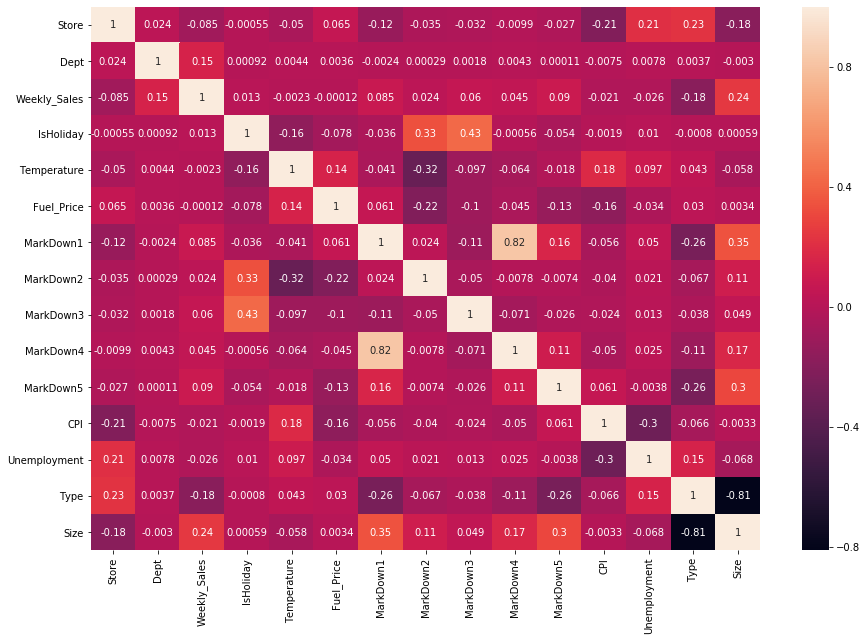

In [13]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,10))
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

In [14]:
df=df.fillna(0)
df['Temperature'] = (df['Temperature']- 32) * 5./9.
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-05-02,24924.50,0,-14.595679,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0,151315
1,1,2,2010-05-02,50605.27,0,-14.595679,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0,151315
2,1,3,2010-05-02,13740.12,0,-14.595679,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0,151315
3,1,4,2010-05-02,39954.04,0,-14.595679,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0,151315
4,1,5,2010-05-02,32229.38,0,-14.595679,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0,151315
5,1,6,2010-05-02,5749.03,0,-14.595679,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0,151315
6,1,7,2010-05-02,21084.08,0,-14.595679,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0,151315
7,1,8,2010-05-02,40129.01,0,-14.595679,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0,151315
8,1,9,2010-05-02,16930.99,0,-14.595679,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0,151315
9,1,10,2010-05-02,30721.50,0,-14.595679,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0,151315


In [15]:
df.corr()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
Store,1.000000,0.024004,-0.085195,-0.000548,-0.050097,0.065290,-0.059844,-0.033829,-0.020331,-0.042724,-0.012452,-0.211088,0.208552,0.226410,-0.182881
Dept,0.024004,1.000000,0.148032,0.000916,0.004437,0.003572,0.001494,0.000587,0.001475,0.001937,0.002668,-0.007477,0.007837,0.003708,-0.002966
Weekly_Sales,-0.085195,0.148032,1.000000,0.012774,-0.002312,-0.000120,0.047172,0.020716,0.038562,0.037467,0.050465,-0.020921,-0.025864,-0.182242,0.243828
IsHoliday,-0.000548,0.000916,0.012774,1.000000,-0.155949,-0.078281,-0.003521,0.207604,0.266471,0.011565,-0.015235,-0.001944,0.010460,-0.000798,0.000593
Temperature,-0.050097,0.004437,-0.002312,-0.155949,1.000000,0.143859,-0.026415,-0.179672,-0.056026,-0.050281,-0.014752,0.182112,0.096730,0.042981,-0.058313
Fuel_Price,0.065290,0.003572,-0.000120,-0.078281,0.143859,1.000000,0.297056,0.029153,0.018615,0.166622,0.215420,-0.164210,-0.033853,0.029687,0.003361
MarkDown1,-0.059844,0.001494,0.047172,-0.003521,-0.026415,0.297056,1.000000,0.174868,-0.014411,0.838904,0.415050,0.010915,-0.105168,-0.126345,0.169788
MarkDown2,-0.033829,0.000587,0.020716,0.207604,-0.179672,0.029153,0.174868,1.000000,-0.006080,0.113250,0.131735,-0.003554,-0.041427,-0.055318,0.078372
MarkDown3,-0.020331,0.001475,0.038562,0.266471,-0.056026,0.018615,-0.014411,-0.006080,1.000000,-0.012020,0.042471,-0.005839,-0.018078,-0.024013,0.033641
MarkDown4,-0.042724,0.001937,0.037467,0.011565,-0.050281,0.166622,0.838904,0.113250,-0.012020,1.000000,0.303370,-0.002047,-0.076513,-0.089770,0.127334


In [16]:
df.shape

(421570, 16)

In [109]:
sales.shape

(421570, 5)

In [17]:
df.isnull().sum() 

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

In [42]:
df['Weekly_Sales']=df['Weekly_Sales'].abs()

In [19]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-05-02,24924.50,0,-14.595679,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,151315
1,1,2,2010-05-02,50605.27,0,-14.595679,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,151315
2,1,3,2010-05-02,13740.12,0,-14.595679,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,151315
3,1,4,2010-05-02,39954.04,0,-14.595679,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,151315
4,1,5,2010-05-02,32229.38,0,-14.595679,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,151315


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null datetime64[ns]
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null int64
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       421570 non-null float64
MarkDown2       421570 non-null float64
MarkDown3       421570 non-null float64
MarkDown4       421570 non-null float64
MarkDown5       421570 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
Type            421570 non-null int32
Size            421570 non-null int64
dtypes: datetime64[ns](1), float64(10), int32(1), int64(4)
memory usage: 53.1 MB


In [21]:
df.describe()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.676377,0.070358,-9.108007,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,0.589912,136727.915739
std,12.785297,30.492054,22710.889199,0.255750,5.693806,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,0.666337,60980.583328
min,1.000000,1.000000,0.000000,0.000000,-28.290123,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,0.000000,34875.000000
25%,11.000000,18.000000,2079.757500,0.000000,-13.246914,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,0.000000,93638.000000
50%,22.000000,37.000000,7612.030000,0.000000,-8.490741,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,0.000000,140167.000000
75%,33.000000,74.000000,20205.852500,0.000000,-4.728395,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,1.000000,202505.000000
max,45.000000,99.000000,693099.360000,1.000000,3.253086,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,2.000000,219622.000000


In [22]:
df = df.reindex(
    columns=['Date', 'Store', 'Dept','Type', 'Size', 'MarkDown1',
             'MarkDown2', 'MarkDown3', 'MarkDown4','MarkDown5',
             'CPI','Temperature','Fuel_Price','Unemployment',
             'IsHoliday', 'Weekly_Sales'])

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null datetime64[ns]
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       150681 non-null float64
MarkDown2       111248 non-null float64
MarkDown3       137091 non-null float64
MarkDown4       134967 non-null float64
MarkDown5       151432 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
Type            421570 non-null object
Size            421570 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(10), int64(3), object(1)
memory usage: 51.9+ MB


In [23]:
df.head()

,Date,Store,Dept,Type,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Temperature,Fuel_Price,Unemployment,IsHoliday,Weekly_Sales
0,2010-05-02,1,1,0,151315,0.0,0.0,0.0,0.0,0.0,211.096358,-14.595679,2.572,8.106,0,24924.50
1,2010-05-02,1,2,0,151315,0.0,0.0,0.0,0.0,0.0,211.096358,-14.595679,2.572,8.106,0,50605.27
2,2010-05-02,1,3,0,151315,0.0,0.0,0.0,0.0,0.0,211.096358,-14.595679,2.572,8.106,0,13740.12
3,2010-05-02,1,4,0,151315,0.0,0.0,0.0,0.0,0.0,211.096358,-14.595679,2.572,8.106,0,39954.04
4,2010-05-02,1,5,0,151315,0.0,0.0,0.0,0.0,0.0,211.096358,-14.595679,2.572,8.106,0,32229.38


In [24]:
df.corr()

,Store,Dept,Type,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Temperature,Fuel_Price,Unemployment,IsHoliday,Weekly_Sales
Store,1.000000,0.024004,0.226410,-0.182881,-0.059844,-0.033829,-0.020331,-0.042724,-0.012452,-0.211088,-0.050097,0.065290,0.208552,-0.000548,-0.085198
Dept,0.024004,1.000000,0.003708,-0.002966,0.001494,0.000587,0.001475,0.001937,0.002668,-0.007477,0.004437,0.003572,0.007837,0.000916,0.148035
Type,0.226410,0.003708,1.000000,-0.811593,-0.126345,-0.055318,-0.024013,-0.089770,-0.130125,-0.065812,0.042981,0.029687,0.148720,-0.000798,-0.182245
Size,-0.182881,-0.002966,-0.811593,1.000000,0.169788,0.078372,0.033641,0.127334,0.153011,-0.003314,-0.058313,0.003361,-0.068238,0.000593,0.243833
MarkDown1,-0.059844,0.001494,-0.126345,0.169788,1.000000,0.174868,-0.014411,0.838904,0.415050,0.010915,-0.026415,0.297056,-0.105168,-0.003521,0.047171
MarkDown2,-0.033829,0.000587,-0.055318,0.078372,0.174868,1.000000,-0.006080,0.113250,0.131735,-0.003554,-0.179672,0.029153,-0.041427,0.207604,0.020720
MarkDown3,-0.020331,0.001475,-0.024013,0.033641,-0.014411,-0.006080,1.000000,-0.012020,0.042471,-0.005839,-0.056026,0.018615,-0.018078,0.266471,0.038561
MarkDown4,-0.042724,0.001937,-0.089770,0.127334,0.838904,0.113250,-0.012020,1.000000,0.303370,-0.002047,-0.050281,0.166622,-0.076513,0.011565,0.037467
MarkDown5,-0.012452,0.002668,-0.130125,0.153011,0.415050,0.131735,0.042471,0.303370,1.000000,0.067906,-0.014752,0.215420,-0.120406,-0.015235,0.050464
CPI,-0.211088,-0.007477,-0.065812,-0.003314,0.010915,-0.003554,-0.005839,-0.002047,0.067906,1.000000,0.182112,-0.164210,-0.299953,-0.001944,-0.020924


# Move Towards univariate analysis

In [25]:
import seaborn as sns
from matplotlib import pyplot as plt

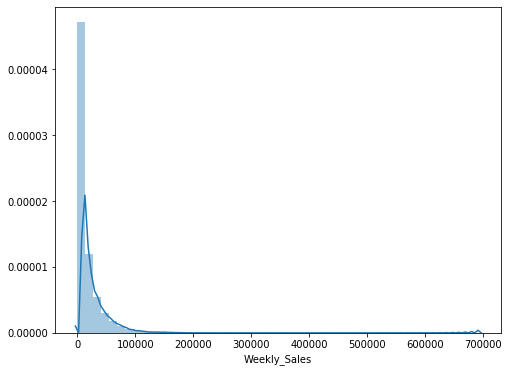

In [26]:
plt.figure(figsize=(8,6))
sns.distplot(df['Weekly_Sales'])

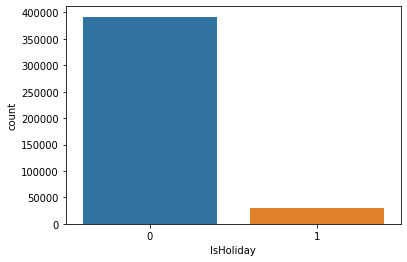

In [27]:
plt.figure(figsize=(6,4))
sns.countplot(df['IsHoliday'])

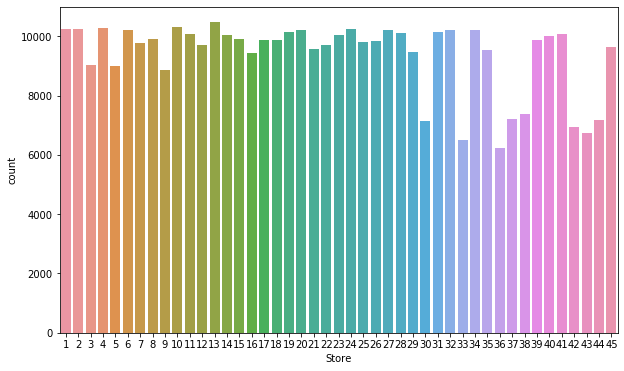

In [28]:
plt.figure(figsize=(10,6))
sns.countplot(df['Store'])

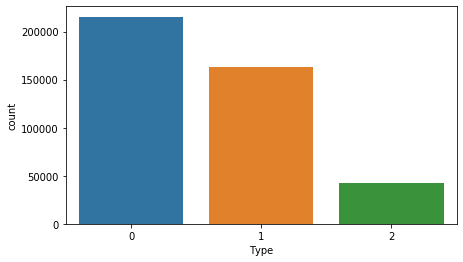

In [29]:
plt.figure(figsize=(7,4))
sns.countplot(df['Type'])

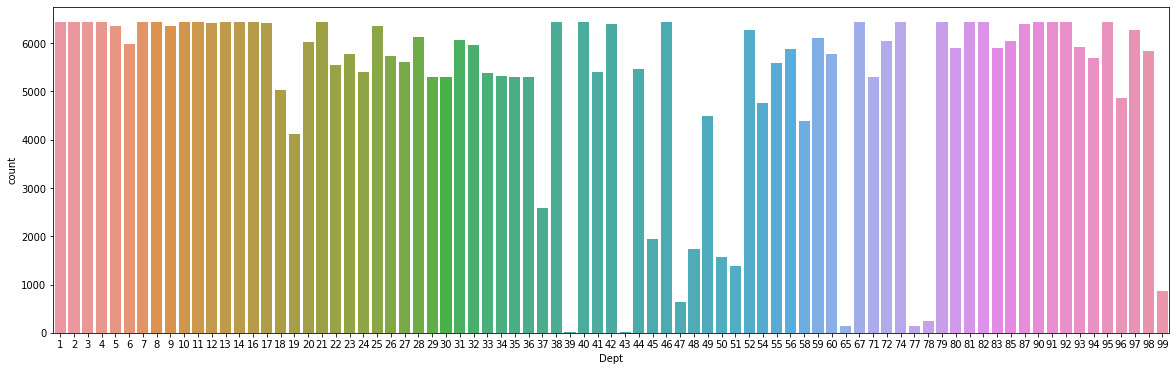

In [30]:
plt.figure(figsize=(20,6))
sns.countplot(df['Dept'])

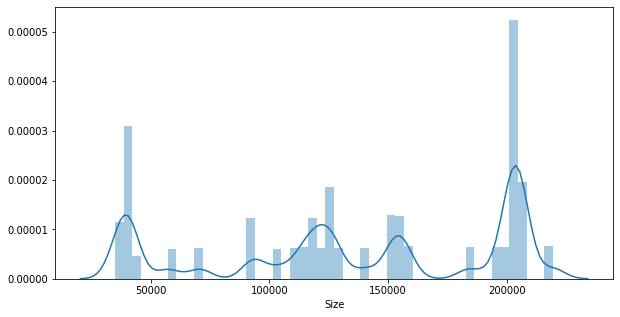

In [31]:
plt.figure(figsize=(10,5))
sns.distplot(df['Size'])

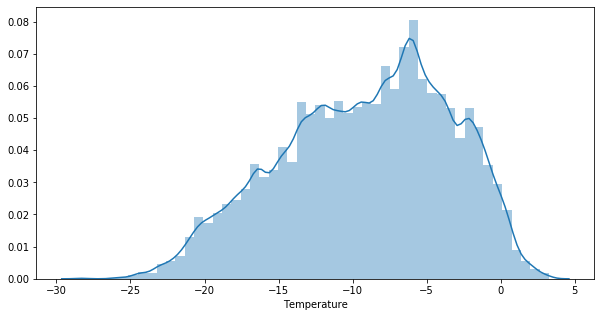

In [32]:
plt.figure(figsize=(10,5))
sns.distplot(df['Temperature'])

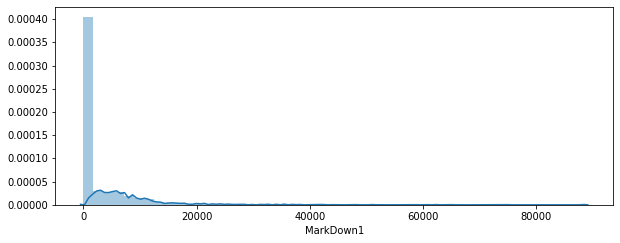

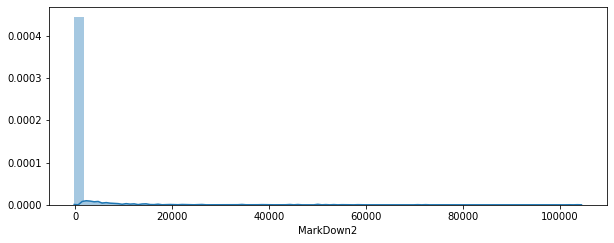

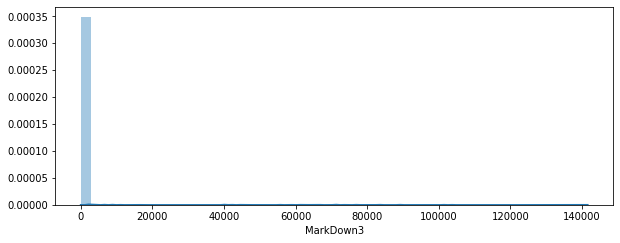

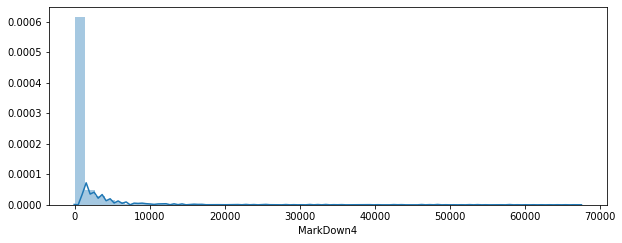

In [33]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
a = sns.distplot(df['MarkDown1'])
plt.show(a)
plt.figure(figsize=(10,8))
plt.subplot(2,1,2)
b = sns.distplot(df['MarkDown2'])
plt.show(b)
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
c = sns.distplot(df['MarkDown3'])
plt.show(c)
plt.figure(figsize=(10,8))
plt.subplot(2,1,2)
d = sns.distplot(df['MarkDown4'])
plt.show(d)

# Move Towards Bivariate Analysis

# Weekly_Sales vs Store

In [34]:
cd/Users/Sangita/Desktop/Retail_Data_Analytics/Bivariaent analysis

[WinError 3] The system cannot find the path specified: '/Users/Sangita/Desktop/Retail_Data_Analytics/Bivariaent analysis'
C:\Users\User\Downloads\capstone project group 13


In [ ]:
from IPython.display import Image
Image(filename='Weekly_Sales vs Store.png') 

# Weekly_Sales vs Store

In [ ]:
Image(filename='Dept_wise Weekly_Sales.png') 

# Dept-Low Weekly_Sales

In [ ]:
Image(filename='Dept-Low Weekly_Sales.png') 

# Temperature Vs Weekly_Sales 

In [ ]:
Image(filename='Temp vs Weekly_Sales.png') 

# Store,Size,Weekly_Sales

In [ ]:
Image(filename='Store,Size,Weekly_Sales.png')

# MarkDown1 Vs Weekly_Sales

In [ ]:
Image(filename='MarkDown1.png')

# MarkDown2 Vs Weekly_Sales

In [ ]:
Image(filename='MarkDown2.png')

# MarkDown3 Vs Weekly_Sales

In [ ]:
Image(filename='MarkDown3.png')

# MarkDown4 Vs Weekly_Sales

In [ ]:
Image(filename='MarkDown4.png')

# MarkDown5 Vs Weekly_Sales

In [ ]:
Image(filename='MarkDown5.png')

# CPI vs Weekly_Sales

In [ ]:
Image(filename='CPI vs Weekly_Sales.png')

# Type vs Weekly_Sales

In [ ]:
Image(filename='Type vs Weekly_Sales.png')

# Fuel_Price vs Weekly_Sales

In [ ]:
Image(filename='Fuel_Price vs Weekly_Sales .png')

# Date vs Weekly_Sales

In [ ]:
Image(filename='Date vs Weekly_Sales.png')

# IsHoliday vs Weekly_Sales

In [ ]:
Image(filename='IsHoliday vs Weekly_Sales.png')

# IsHoliday vs Weekly_Sales

In [ ]:
Image(filename='Year ,Weekly_Sales,IsHoliday.png')

# Top 5 Store,Dept

In [ ]:
Image(filename='Top 5 Store,IsHoliday,Weekly_Sales.png')

# Bottom 5 Store,Dept

In [ ]:
Image(filename='Bottom 5 Store,IsHoliday,Weekly_Sales.png')

In [36]:
import statsmodels.api as sm

In [37]:
x=df.drop(['Date',"Weekly_Sales"],1)
y=df['Weekly_Sales']

In [38]:
x=df.drop(['Date',"Weekly_Sales"],1)
y=df['Weekly_Sales']
x_constant=sm.add_constant(x)
x_constant.head()

,const,Store,Dept,Type,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Temperature,Fuel_Price,Unemployment,IsHoliday
0,1.0,1,1,0,151315,0.0,0.0,0.0,0.0,0.0,211.096358,-14.595679,2.572,8.106,0
1,1.0,1,2,0,151315,0.0,0.0,0.0,0.0,0.0,211.096358,-14.595679,2.572,8.106,0
2,1.0,1,3,0,151315,0.0,0.0,0.0,0.0,0.0,211.096358,-14.595679,2.572,8.106,0
3,1.0,1,4,0,151315,0.0,0.0,0.0,0.0,0.0,211.096358,-14.595679,2.572,8.106,0
4,1.0,1,5,0,151315,0.0,0.0,0.0,0.0,0.0,211.096358,-14.595679,2.572,8.106,0


In [39]:
model=sm.OLS(y,x_constant).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     2873.
Date:                Wed, 27 Nov 2019   Prob (F-statistic):               0.00
Time:                        18:01:15   Log-Likelihood:            -4.8076e+06
No. Observations:              421570   AIC:                         9.615e+06
Df Residuals:                  421555   BIC:                         9.615e+06
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         6156.3488    463.632     13.279      0.000    5247.645    7065.053
Store          -93.6499      2.779    -33.693      0.000     -99.098     -88.202
Dept           111.4336      1.096    101.635      0.000     109.285     113.583
Type          1900.6745     87.770     21.655      0.000    1728.648    2072.701
Size             0.1029      0.001    107.797      0.000       0.101       0.105
MarkDown1       -0.0138      0.011     -1.231      0.218      -0.036       0.008
MarkDown2        0.0006      0.007      0.082      0.935      -0.013       0.014
MarkDown3        0.1127      0.006     17.851      0.000       0.100       0.125
MarkDown4        0.0277      0.016      1.725      0.085      -0.004       0.059
MarkDown5        0.0923      0.009     10.328      0.000       0.075       0.110
CPI            -22.3637      0.957    -23.377      0.000     -24.239     -20.489
Temperature     87.1449      6.350     13.724      0.000      74.699      99.591
Fuel_Price    -650.7989     81.456     -7.990      0.000    -810.450    -491.148
Unemployment  -208.8738     19.686    -10.610      0.000    -247.458    -170.290
IsHoliday      695.1949    140.496      4.948      0.000     419.826     970.564
==============================================================================
Omnibus:                   296376.720   Durbin-Watson:                   1.317
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8777287.554
Skew:                           3.022   Prob(JB):                         0.00
Kurtosis:                      24.521   Cond. No.                     2.10e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
x=df.drop(['Weekly_Sales','Date'],1)
y=df['Weekly_Sales']

In [41]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=0)

In [42]:
LR = LinearRegression()
LR.fit(x_train, y_train)
y_pred=LR.predict(x_test)

In [43]:
LR.score(x_test,y_test)

0.08651793809348496

In [44]:



LR.score(x_train,y_train)

0.08731028658317197

In [45]:
mae=metrics.mean_absolute_error(y_test,y_pred)
print(mae)
mse=metrics.mean_squared_error(y_test,y_pred)
print(mse)
rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print(rmse)

14575.943217183796
472983398.64231753
21748.181501962816


In [46]:
Model=[]
Accuracy_train=[]
Accuracy_test=[]
RMSE=[]
MSE=[]
MAE=[]

In [47]:
Model=['Linear Regression']
Accuracy_train=[LR.score(x_train,y_train)]
Accuracy_test=[LR.score(x_test,y_test)]
RMSE=[np.sqrt(metrics.mean_squared_error(y_test,y_pred))]
MSE=[metrics.mean_squared_error(y_test,y_pred)]
MAE=[metrics.mean_absolute_error(y_test,y_pred)]

# Feature Selection

# VIF

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def cal_vif(x):
    thresh = 5
    output= pd.DataFrame()
    k = x.shape[1]
    vif = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    for i in range(1,k):
        print('Iteration no ',i)
        print(vif)
        a = np.argmax(vif)
        print('Max vif is for variable no : ',a)
        if(vif[a]<=thresh):
            break
        if(i==1):
            output = x.drop(x.columns[a],axis=1)
            vif = [variance_inflation_factor(output.values,j) for j in range(output.shape[1])]
        elif(i>1):
            output = output.drop(output.columns[a],axis=1)
            vif = [variance_inflation_factor(output.values,j) for j in range(output.shape[1])]
    return(output)     

selected_features = cal_vif(x)
selected_features.head()

Iteration no  1
[4.506062183878648, 3.075805599692958, 5.049615248494754, 15.917893436448516, 4.771518991694488, 1.1571000164977139, 1.0976347108329043, 3.759097302338092, 1.4561873083854493, 14.475390698248477, 3.6049309860135827, 34.674281261186614, 18.13846176130629, 1.2425751433593784]
Max vif is for variable no :  11
Iteration no  2
[4.385204848296711, 3.0438039312995135, 4.468873829412516, 13.602272634626276, 4.535720416460031, 1.1564109523845956, 1.0963439349043076, 3.696330715846391, 1.4476024767671747, 11.736014021392064, 3.57499220526148, 15.703619909724823, 1.2388973644876184]
Max vif is for variable no :  11
Iteration no  3
[4.011635041132327, 3.012197895537471, 3.4516741969609197, 9.891868974657024, 4.533694534046666, 1.1556608255580476, 1.0959594893797346, 3.696281222749149, 1.4388855758850452, 11.229670883482363, 3.5724198533367275, 1.2376438451599492]
Max vif is for variable no :  9
Iteration no  4
[4.007952271618237, 2.924250110916076, 2.31088131885725, 4.8490412809676

,Store,Dept,Type,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Temperature,IsHoliday
0,1,1,0,151315,0.0,0.0,0.0,0.0,0.0,-14.595679,0
1,1,2,0,151315,0.0,0.0,0.0,0.0,0.0,-14.595679,0
2,1,3,0,151315,0.0,0.0,0.0,0.0,0.0,-14.595679,0
3,1,4,0,151315,0.0,0.0,0.0,0.0,0.0,-14.595679,0
4,1,5,0,151315,0.0,0.0,0.0,0.0,0.0,-14.595679,0


In [49]:
x.columns

Index(['Store', 'Dept', 'Type', 'Size', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Temperature', 'Fuel_Price',
       'Unemployment', 'IsHoliday'],
      dtype='object')

In [50]:
x=df.drop(['Fuel_Price','CPI','Unemployment','Date','Weekly_Sales'],1)
x_constant=sm.add_constant(x)

In [51]:
x_constant.head()

,const,Store,Dept,Type,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Temperature,IsHoliday
0,1.0,1,1,0,151315,0.0,0.0,0.0,0.0,0.0,-14.595679,0
1,1.0,1,2,0,151315,0.0,0.0,0.0,0.0,0.0,-14.595679,0
2,1.0,1,3,0,151315,0.0,0.0,0.0,0.0,0.0,-14.595679,0
3,1.0,1,4,0,151315,0.0,0.0,0.0,0.0,0.0,-14.595679,0
4,1.0,1,5,0,151315,0.0,0.0,0.0,0.0,0.0,-14.595679,0


In [52]:
model=sm.OLS(y,x_constant).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     3600.
Date:                Wed, 27 Nov 2019   Prob (F-statistic):               0.00
Time:                        18:02:48   Log-Likelihood:            -4.8079e+06
No. Observations:              421570   AIC:                         9.616e+06
Df Residuals:                  421558   BIC:                         9.616e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2143.0460    194.784    -11.002      0.000   -2524.817   -1761.275
Store         -87.7696      2.696    -32.551      0.000     -93.054     -82.485
Dept          111.4994      1.097    101.627      0.000     109.349     113.650
Type         1931.2733     86.784     22.254      0.000    1761.179    2101.367
Size            0.1040      0.001    109.753      0.000       0.102       0.106
MarkDown1      -0.0294      0.011     -2.716      0.007      -0.051      -0.008
MarkDown2      -0.0019      0.007     -0.279      0.780      -0.016       0.012
MarkDown3       0.1126      0.006     17.845      0.000       0.100       0.125
MarkDown4       0.0451      0.016      2.837      0.005       0.014       0.076
MarkDown5       0.0765      0.009      8.648      0.000       0.059       0.094
Temperature    45.2952      6.050      7.486      0.000      33.437      57.154
IsHoliday     634.6758    140.220      4.526      0.000     359.850     909.502
==============================================================================
Omnibus:                   296409.887   Durbin-Watson:                   1.316
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8773071.445
Skew:                           3.022   Prob(JB):                         0.00
Kurtosis:                      24.515   Cond. No.                     9.24e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.24e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
x=df.drop(['Fuel_Price','CPI','Unemployment','Date','Weekly_Sales'],1)
y=df['Weekly_Sales']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=0)
LR = LinearRegression()
LR.fit(x_train, y_train)
y_pred=LR.predict(x_test)

In [54]:
Model.append(' VIF Linear Regression')
Accuracy_train.append(LR.score(x_train,y_train))
Accuracy_test.append(LR.score(x_test,y_test))
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
MSE.append(metrics.mean_squared_error(y_test,y_pred))
MAE.append(metrics.mean_absolute_error(y_test,y_pred))

In [55]:
Model,Accuracy_train,Accuracy_test,RMSE,MSE,MAE

(['Linear Regression', ' VIF Linear Regression'],
 [0.08731028658317197, 0.08596340329202623],
 [0.08651793809348496, 0.08556213837891946],
 [21748.181501962816, 21759.556367388843],
 [472983398.64231753, 473478293.30557233],
 [14575.943217183796, 14585.99582934633])

# BACKWARD Elimination

In [56]:
cols=list(x.columns)
pmax=1
while (len(cols)>0):
    p=[]
    x_1=x[cols]
    x_1=sm.add_constant(x_1)
    model=sm.OLS(y,x_1).fit()
    p=pd.Series(model.pvalues.values[1:],index=cols)
    pmax=max(p)
    features_with_p_max=p.idxmax() 
    if(pmax>0.05):
        cols.remove(features_with_p_max)
    else:
        break
selected_features=cols
print(selected_features)

['Store', 'Dept', 'Type', 'Size', 'MarkDown1', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'Temperature', 'IsHoliday']


In [57]:
df.columns

Index(['Date', 'Store', 'Dept', 'Type', 'Size', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Temperature',
       'Fuel_Price', 'Unemployment', 'IsHoliday', 'Weekly_Sales'],
      dtype='object')

In [58]:
x_constant=sm.add_constant(x)
model=sm.OLS(y,x_constant).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     3600.
Date:                Wed, 27 Nov 2019   Prob (F-statistic):               0.00
Time:                        18:02:52   Log-Likelihood:            -4.8079e+06
No. Observations:              421570   AIC:                         9.616e+06
Df Residuals:                  421558   BIC:                         9.616e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2143.0460    194.784    -11.002      0.000   -2524.817   -1761.275
Store         -87.7696      2.696    -32.551      0.000     -93.054     -82.485
Dept          111.4994      1.097    101.627      0.000     109.349     113.650
Type         1931.2733     86.784     22.254      0.000    1761.179    2101.367
Size            0.1040      0.001    109.753      0.000       0.102       0.106
MarkDown1      -0.0294      0.011     -2.716      0.007      -0.051      -0.008
MarkDown2      -0.0019      0.007     -0.279      0.780      -0.016       0.012
MarkDown3       0.1126      0.006     17.845      0.000       0.100       0.125
MarkDown4       0.0451      0.016      2.837      0.005       0.014       0.076
MarkDown5       0.0765      0.009      8.648      0.000       0.059       0.094
Temperature    45.2952      6.050      7.486      0.000      33.437      57.154
IsHoliday     634.6758    140.220      4.526      0.000     359.850     909.502
==============================================================================
Omnibus:                   296409.887   Durbin-Watson:                   1.316
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8773071.445
Skew:                           3.022   Prob(JB):                         0.00
Kurtosis:                      24.515   Cond. No.                     9.24e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.24e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
x=df.drop(['Fuel_Price','CPI','Unemployment','Date','Weekly_Sales'],1)
y=df['Weekly_Sales']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=0)
LR = LinearRegression()
LR.fit(x_train, y_train)
y_pred=LR.predict(x_test)

In [60]:
Model.append('Backward Linear Regression')
Accuracy_train.append(LR.score(x_train,y_train))
Accuracy_test.append(LR.score(x_test,y_test))
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
MSE.append(metrics.mean_squared_error(y_test,y_pred))
MAE.append(metrics.mean_absolute_error(y_test,y_pred))

In [61]:
Model,Accuracy_train,Accuracy_test,RMSE,MSE,MAE

(['Linear Regression', ' VIF Linear Regression', 'Backward Linear Regression'],
 [0.08731028658317197, 0.08596340329202623, 0.08596340329202623],
 [0.08651793809348496, 0.08556213837891946, 0.08556213837891946],
 [21748.181501962816, 21759.556367388843, 21759.556367388843],
 [472983398.64231753, 473478293.30557233, 473478293.30557233],
 [14575.943217183796, 14585.99582934633, 14585.99582934633])

# RFE

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [63]:
nof_list=np.arange(1,10)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 8
Score with 8 features: 0.085574


In [64]:
cols = list(x.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 9)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(x,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['Store', 'Dept', 'Type', 'Size', 'MarkDown3', 'MarkDown4', 'MarkDown5',
       'Temperature', 'IsHoliday'],
      dtype='object')


In [65]:
x=df[['Store', 'Dept', 'Type', 'MarkDown3', 'CPI', 'Temperature',
       'Fuel_Price', 'Unemployment', 'IsHoliday']]
y=df['Weekly_Sales']

In [66]:
x_constant=sm.add_constant(x)
model=sm.OLS(y,x_constant).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     3030.
Date:                Wed, 27 Nov 2019   Prob (F-statistic):               0.00
Time:                        18:03:06   Log-Likelihood:            -4.8136e+06
No. Observations:              421570   AIC:                         9.627e+06
Df Residuals:                  421560   BIC:                         9.627e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2.257e+04    430.395     52.448      0.000    2.17e+04    2.34e+04
Store         -102.0009      2.811    -36.284      0.000    -107.511     -96.491
Dept           111.4448      1.112    100.211      0.000     109.265     113.625
Type         -5862.1317     52.598   -111.452      0.000   -5965.222   -5759.041
MarkDown3        0.1311      0.006     20.570      0.000       0.119       0.144
CPI            -27.3397      0.964    -28.369      0.000     -29.229     -25.451
Temperature     53.9195      6.343      8.501      0.000      41.487      66.352
Fuel_Price     -87.6627     77.029     -1.138      0.255    -238.638      63.313
Unemployment   -54.4523     19.845     -2.744      0.006     -93.347     -15.558
IsHoliday      523.2404    139.434      3.753      0.000     249.953     796.527
==============================================================================
Omnibus:                   297046.044   Durbin-Watson:                   1.281
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8387671.529
Skew:                           3.050   Prob(JB):                         0.00
Kurtosis:                      23.983   Cond. No.                     7.11e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
x=df[['Store', 'Dept', 'Type', 'MarkDown3', 'CPI', 'Temperature','Fuel_Price', 'Unemployment', 'IsHoliday']]
y=df['Weekly_Sales']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=0)
LR = LinearRegression()
LR.fit(x_train, y_train)
y_pred=LR.predict(x_test)

In [68]:
Model.append('RFE Linear Regression')
Accuracy_train.append(LR.score(x_train,y_train))
Accuracy_test.append(LR.score(x_test,y_test))
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
MSE.append(metrics.mean_squared_error(y_test,y_pred))
MAE.append(metrics.mean_absolute_error(y_test,y_pred))

In [69]:
Model,Accuracy_train,Accuracy_test,RMSE,MSE,MAE

(['Linear Regression',
  ' VIF Linear Regression',
  'Backward Linear Regression',
  'RFE Linear Regression'],
 [0.08731028658317197,
  0.08596340329202623,
  0.08596340329202623,
  0.060977021050784286],
 [0.08651793809348496,
  0.08556213837891946,
  0.08556213837891946,
  0.06018877259861344],
 [21748.181501962816,
  21759.556367388843,
  21759.556367388843,
  22059.37743632307],
 [472983398.64231753,
  473478293.30557233,
  473478293.30557233,
  486616132.8781594],
 [14575.943217183796,
  14585.99582934633,
  14585.99582934633,
  14834.971963141386])

# Step Forward Selection

In [70]:
from sklearn.metrics import accuracy_score as acc
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [71]:
LR = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)


# Build step forward feature selection
sfs1 = sfs(LR,k_features = 5,forward=True,floating=False, scoring='r2',verbose=2,cv=5)

# Perform SFFS
sfs1 = sfs1.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.8s finished

[2019-11-27 18:03:09] Features: 1/5 -- score: 0.03306518645356131[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    3.2s finished

[2019-11-27 18:03:12] Features: 2/5 -- score: 0.05537136151298745[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    3.3s finished

[2019-11-27 18:03:15] Features: 3/5 -- score: 0.05780477327811695[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [72]:
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 3, 4]


In [73]:
x.columns

Index(['Store', 'Dept', 'Type', 'MarkDown3', 'CPI', 'Temperature',
       'Fuel_Price', 'Unemployment', 'IsHoliday'],
      dtype='object')

In [74]:
x=df.drop(['Date','MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5','Temperature', 'Fuel_Price',
       'Unemployment', 'IsHoliday','Weekly_Sales'],1)
y=df['Weekly_Sales']

In [75]:
x_constant=sm.add_constant(x)
model=sm.OLS(y,x_constant).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     7870.
Date:                Wed, 27 Nov 2019   Prob (F-statistic):               0.00
Time:                        18:04:31   Log-Likelihood:            -4.8080e+06
No. Observations:              421570   AIC:                         9.616e+06
Df Residuals:                  421564   BIC:                         9.616e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        804.3003    261.202      3.079      0.002     292.352    1316.249
Store        -99.2058      2.744    -36.156      0.000    -104.584     -93.828
Dept         111.5716      1.097    101.669      0.000     109.421     113.722
Type        1791.8364     87.096     20.573      0.000    1621.132    1962.541
Size           0.1030      0.001    109.185      0.000       0.101       0.105
CPI          -15.7845      0.878    -17.969      0.000     -17.506     -14.063
==============================================================================
Omnibus:                   298340.155   Durbin-Watson:                   1.315
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9097783.931
Skew:                           3.041   Prob(JB):                         0.00
Kurtosis:                      24.930   Cond. No.                     1.20e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [76]:
x=df.drop(['Date','MarkDown1', 'MarkDown2', 'MarkDown3','MarkDown4', 'MarkDown5','Temperature', 'Fuel_Price',
       'Unemployment', 'IsHoliday','Weekly_Sales'],1)
y=df['Weekly_Sales']

In [77]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=0)
LR = LinearRegression()
LR.fit(x_train, y_train)
y_pred=LR.predict(x_test)

In [78]:
Model.append('Step Forward Selection Linear Regression')
Accuracy_train.append(LR.score(x_train,y_train))
Accuracy_test.append(LR.score(x_test,y_test))
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
MSE.append(metrics.mean_squared_error(y_test,y_pred))
MAE.append(metrics.mean_absolute_error(y_test,y_pred))

In [79]:
Model,Accuracy_train,Accuracy_test,RMSE,MSE,MAE

(['Linear Regression',
  ' VIF Linear Regression',
  'Backward Linear Regression',
  'RFE Linear Regression',
  'Step Forward Selection Linear Regression'],
 [0.08731028658317197,
  0.08596340329202623,
  0.08596340329202623,
  0.060977021050784286,
  0.0856572397297638],
 [0.08651793809348496,
  0.08556213837891946,
  0.08556213837891946,
  0.06018877259861344,
  0.08468131039036253],
 [21748.181501962816,
  21759.556367388843,
  21759.556367388843,
  22059.37743632307,
  21770.03374031936],
 [472983398.64231753,
  473478293.30557233,
  473478293.30557233,
  486616132.8781594,
  473934369.05464333],
 [14575.943217183796,
  14585.99582934633,
  14585.99582934633,
  14834.971963141386,
  14587.77194475527])

# Embedded Method

In [80]:
x=df.drop(['Date',"Weekly_Sales"],1)
y=df['Weekly_Sales']

In [81]:
from sklearn.linear_model import  LassoCV
reg = LassoCV()
reg.fit(x, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(x,y))
coef = pd.Series(reg.coef_, index = x.columns)

Best alpha using built-in LassoCV: 446404.847387
Best score using built-in LassoCV: 0.060492


In [82]:
coef

Store          -0.000000
Dept            0.000000
Type            0.000000
Size            0.089912
MarkDown1       0.000500
MarkDown2       0.000000
MarkDown3       0.109103
MarkDown4       0.000000
MarkDown5       0.041397
CPI            -0.000000
Temperature     0.000000
Fuel_Price     -0.000000
Unemployment   -0.000000
IsHoliday       0.000000
dtype: float64

In [83]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  
      str(sum(coef == 0)) + " variables")

Lasso picked 4 variables and eliminated the other 10 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

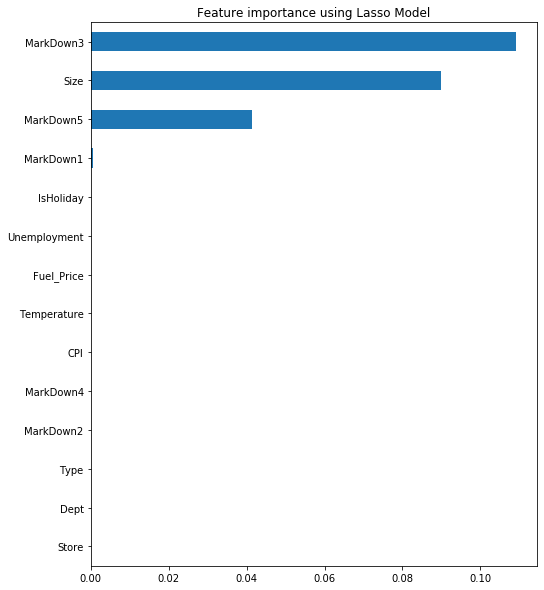

In [84]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [85]:
x=df[['MarkDown1','MarkDown3','MarkDown5']]
y=df['Weekly_Sales']
x_constant=sm.add_constant(x)

In [86]:
model=sm.OLS(y,x_constant).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     675.4
Date:                Wed, 27 Nov 2019   Prob (F-statistic):               0.00
Time:                        18:04:39   Log-Likelihood:            -4.8258e+06
No. Observations:              421570   AIC:                         9.652e+06
Df Residuals:                  421566   BIC:                         9.652e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.527e+04     38.958    392.020      0.000    1.52e+04    1.53e+04
MarkDown1      0.1243      0.006     19.610      0.000       0.112       0.137
MarkDown3      0.1542      0.006     24.400      0.000       0.142       0.167
MarkDown5      0.1895      0.009     20.764      0.000       0.172       0.207
==============================================================================
Omnibus:                   308430.966   Durbin-Watson:                   1.197
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8558297.485
Skew:                           3.238   Prob(JB):                         0.00
Kurtosis:                      24.102   Cond. No.                     7.96e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.96e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Observation:- firstly We build Model without Feature selection and then with Feature Selection but both case accuracy is very very less ,means model is not linear

In [87]:
x=df[['MarkDown1','MarkDown3','MarkDown5']]
y=df['Weekly_Sales']

In [88]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=0)
LR = LinearRegression()
LR.fit(x_train, y_train)
y_pred=LR.predict(x_test)

In [89]:
Model.append(' LassoCV Linear Regression')
Accuracy_train.append(LR.score(x_train,y_train))
Accuracy_test.append(LR.score(x_test,y_test))
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
MSE.append(metrics.mean_squared_error(y_test,y_pred))
MAE.append(metrics.mean_absolute_error(y_test,y_pred))

In [90]:
Model,Accuracy_train,Accuracy_test,RMSE,MSE,MAE

(['Linear Regression',
  ' VIF Linear Regression',
  'Backward Linear Regression',
  'RFE Linear Regression',
  'Step Forward Selection Linear Regression',
  ' LassoCV Linear Regression'],
 [0.08731028658317197,
  0.08596340329202623,
  0.08596340329202623,
  0.060977021050784286,
  0.0856572397297638,
  0.004720521694604463],
 [0.08651793809348496,
  0.08556213837891946,
  0.08556213837891946,
  0.06018877259861344,
  0.08468131039036253,
  0.0048910794769233545],
 [21748.181501962816,
  21759.556367388843,
  21759.556367388843,
  22059.37743632307,
  21770.03374031936,
  22699.079544592696],
 [472983398.64231753,
  473478293.30557233,
  473478293.30557233,
  486616132.8781594,
  473934369.05464333,
  515248212.17174655],
 [14575.943217183796,
  14585.99582934633,
  14585.99582934633,
  14834.971963141386,
  14587.77194475527,
  15129.961739770999])

In [91]:
final_result = pd.DataFrame({'Model':Model,'Accuracy_train':Accuracy_train,'Accuracy_test':Accuracy_test,'RMSE':RMSE,'MSE':MSE,'MAE':MAE})
final_result

,Model,Accuracy_train,Accuracy_test,RMSE,MSE,MAE
0,Linear Regression,0.087310,0.086518,21748.181502,4.729834e+08,14575.943217
1,VIF Linear Regression,0.085963,0.085562,21759.556367,4.734783e+08,14585.995829
2,Backward Linear Regression,0.085963,0.085562,21759.556367,4.734783e+08,14585.995829
3,RFE Linear Regression,0.060977,0.060189,22059.377436,4.866161e+08,14834.971963
4,Step Forward Selection Linear Regression,0.085657,0.084681,21770.033740,4.739344e+08,14587.771945
5,LassoCV Linear Regression,0.004721,0.004891,22699.079545,5.152482e+08,15129.961740


# Move Toward Non Linear Model

In [92]:
df.head()

,Date,Store,Dept,Type,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Temperature,Fuel_Price,Unemployment,IsHoliday,Weekly_Sales
0,2010-05-02,1,1,0,151315,0.0,0.0,0.0,0.0,0.0,211.096358,-14.595679,2.572,8.106,0,24924.50
1,2010-05-02,1,2,0,151315,0.0,0.0,0.0,0.0,0.0,211.096358,-14.595679,2.572,8.106,0,50605.27
2,2010-05-02,1,3,0,151315,0.0,0.0,0.0,0.0,0.0,211.096358,-14.595679,2.572,8.106,0,13740.12
3,2010-05-02,1,4,0,151315,0.0,0.0,0.0,0.0,0.0,211.096358,-14.595679,2.572,8.106,0,39954.04
4,2010-05-02,1,5,0,151315,0.0,0.0,0.0,0.0,0.0,211.096358,-14.595679,2.572,8.106,0,32229.38


# Decision Tree

In [93]:
x=df.drop(['Weekly_Sales','Date'],1)
y=df['Weekly_Sales']

In [94]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=0)

In [95]:
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor()
tree.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [96]:
tree.score(x_test,y_test)

0.9127919379979886

In [97]:
tree.score(x_train,y_train)

1.0

In [98]:
y_pred=tree.predict(x_test)
mae=metrics.mean_absolute_error(y_test,y_pred)
print(mae)
mse=metrics.mean_squared_error(y_test,y_pred)
print(mse)
rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print(rmse)

2417.993239952242
45154653.03022292
6719.721201822507


In [99]:
Model=[]
Accuracy=[]
RMSE=[]

In [100]:
Model.append('Decision Tree')
Accuracy.append(tree.score(x_test,y_test))
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

# Gridsearch

In [101]:
from sklearn.model_selection import GridSearchCV

In [102]:
parms ={'max_depth':[1,2,3,4,5]}

In [103]:
grid_search=GridSearchCV(DecisionTreeRegressor(),param_grid=parms,n_jobs=-1,verbose=0)
grid_search.fit(x_train,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=-1, param_grid={'max_depth': [1, 2, 3, 4, 5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [104]:
grid_search.best_params_

{'max_depth': 5}

In [105]:
tree=DecisionTreeRegressor(max_depth = 5)
tree.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [106]:
tree.score(x_test,y_test)

0.5427011338786959

In [107]:
tree.score(x_train,y_train)

0.5400793035202585

In [108]:
y_pred=tree.predict(x_test)
mae=metrics.mean_absolute_error(y_test,y_pred)
print(mae)
mse=metrics.mean_squared_error(y_test,y_pred)
print(mse)
rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print(rmse)

9503.156357777547
236780535.61545247
15387.674795610039


# Random Forest

In [109]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor()
RF.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [110]:
RF.score(x_test,y_test)

0.943299202741434

In [111]:
RF.score(x_train,y_train)

0.9882690667563463

In [112]:
y_pred=RF.predict(x_test)
mae=metrics.mean_absolute_error(y_test,y_pred)
print(mae)
mse=metrics.mean_squared_error(y_test,y_pred)
print(mse)
rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print(rmse)

1959.358583098102
29358579.56215693
5418.355798778531


In [113]:
Model.append('RandomForest Tree')
Accuracy.append(RF.score(x_test,y_test))
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

In [114]:
Model,Accuracy,RMSE

(['Decision Tree', 'RandomForest Tree'],
 [0.9127919379979886, 0.943299202741434],
 [6719.721201822507, 5418.355798778531])

Gridsearch

In [115]:
from sklearn.model_selection import GridSearchCV

In [116]:
parms = {'max_depth': [2, 3, 4],'bootstrap': [True, False],'max_features': ['auto', 'sqrt', 'log2', None]}

In [117]:
grid_search=GridSearchCV(RandomForestRegressor(),param_grid=parms,n_jobs=-1,verbose=0)

In [118]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bootstrap': [True, False], 

In [119]:
grid_search.best_params_

{'bootstrap': True, 'max_depth': 4, 'max_features': 'auto'}

In [120]:
RF=RandomForestRegressor(bootstrap= True,max_depth= 4,max_features= None)
RF.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [121]:
RF.score(x_test,y_test)

0.4503445179967607

In [122]:
RF.score(x_train,y_train)

0.44392566660477906

In [123]:
y_pred=RF.predict(x_test)
mae=metrics.mean_absolute_error(y_test,y_pred)
print(mae)
mse=metrics.mean_squared_error(y_test,y_pred)
print(mse)
rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print(rmse)

10483.382485170363
284601010.5745013
16870.121830458167


# Ensemble Techniques

# Bagging

In [124]:
from sklearn.ensemble import BaggingRegressor

In [125]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=0)

In [126]:
DT_bag=DecisionTreeRegressor(max_depth=10,min_samples_leaf=10,min_samples_split=60)

In [127]:
DT_bag.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=60, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [128]:
DT_bag.score(x_test,y_test)

0.8598304768083723

In [129]:
DT_bag.score(x_train,y_train)

0.861603045541637

In [130]:
y_pred=DT_bag.predict(x_test)
mae=metrics.mean_absolute_error(y_test,y_pred)
print(mae)
mse=metrics.mean_squared_error(y_test,y_pred)
print(mse)
rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print(rmse)

4393.447882757408
72577076.47469278
8519.218067093527


In [131]:
Model.append('DT_bag Tree')
Accuracy.append(DT_bag.score(x_test,y_test))
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

# Boosting

In [132]:
from sklearn.ensemble import AdaBoostRegressor
dt_Boost = AdaBoostRegressor(base_estimator=tree,n_estimators=10,learning_rate=0.01,random_state=1)
dt_Boost.fit(x_train,y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',
                                                       max_depth=5,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort=False,
                                                       random_state=None,
                                                       splitter='best'),
                  learning_rate=0.01, loss='linear', n_estimators=10,
                  random_

In [133]:
dt_Boost.score(x_test,y_test)

0.5432757508880157

In [134]:
dt_Boost.score(x_train,y_train)

0.5407005933472047

In [135]:
y_pred=dt_Boost.predict(x_test)

In [136]:
mae=metrics.mean_absolute_error(y_test,y_pred)
print(mae)
mse=metrics.mean_squared_error(y_test,y_pred)
print(mse)
rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print(rmse)

9509.126079304746
236483010.00732112
15378.0040969991


In [137]:
Model.append('DT_Boost')
Accuracy.append(dt_Boost.score(x_test,y_test))
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

# Random Forest

In [138]:
RF_Boost = AdaBoostRegressor(base_estimator=RF,n_estimators=10,learning_rate=0.01,random_state=1)
RF_Boost.fit(x_train,y_train)

AdaBoostRegressor(base_estimator=RandomForestRegressor(bootstrap=True,
                                                       criterion='mse',
                                                       max_depth=4,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       n_estimators=10,
                                                       n_jobs=None,
                                                       oob_score=False,
                             

In [139]:
RF_Boost.score(x_test,y_test)

0.45225900002519215

In [140]:
RF_Boost.score(x_train,y_train)

0.44591062396617176

In [141]:
y_pred=RF_Boost.predict(x_test)
mae=metrics.mean_absolute_error(y_test,y_pred)
print(mae)
mse=metrics.mean_squared_error(y_test,y_pred)
print(mse)
rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print(rmse)

10458.374253166274
283609728.69365376
16840.71639490594


In [142]:
Model.append('RF_Boost')
Accuracy.append(RF_Boost.score(x_test,y_test))
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

# GradientBoostingRegressor

In [143]:
from sklearn.ensemble import GradientBoostingRegressor
Gradient_boost = GradientBoostingRegressor(n_estimators=10,learning_rate=0.01,random_state=1)
Gradient_boost.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=10,
                          n_iter_no_change=None, presort='auto', random_state=1,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

In [144]:
y_pred=Gradient_boost.predict(x_test)

In [145]:
mae=metrics.mean_absolute_error(y_test,y_pred)
print(mae)
mse=metrics.mean_squared_error(y_test,y_pred)
print(mse)
rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print(rmse)

14611.07995108854
482237428.8485569
21959.905028222616


In [146]:

Model.append('Gradient_Boosting')
Accuracy.append(Gradient_boost.score(x_test,y_test))
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

# XGBRegressor

In [147]:
from xgboost import XGBRegressor
xgbr = XGBRegressor()
xgbr.fit(x_train,y_train, verbose=False)

[18:39:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [148]:
y_pred=xgbr.predict(x_test)
mae=metrics.mean_absolute_error(y_test,y_pred)
print(mae)
mse=metrics.mean_squared_error(y_test,y_pred)
print(mse)
rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print(rmse)

6832.676152300013
132448353.21035476
11508.620821382325


In [149]:
Model.append('XGBR')
Accuracy.append(xgbr.score(x_test,y_test))
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

In [150]:
Model,Accuracy,RMSE

(['Decision Tree',
  'RandomForest Tree',
  'DT_bag Tree',
  'DT_Boost',
  'RF_Boost',
  'Gradient_Boosting',
  'XGBR'],
 [0.9127919379979886,
  0.943299202741434,
  0.8598304768083723,
  0.5432757508880157,
  0.45225900002519215,
  0.06864544908434456,
  0.7441999124408751],
 [6719.721201822507,
  5418.355798778531,
  8519.218067093527,
  15378.0040969991,
  16840.71639490594,
  21959.905028222616,
  11508.620821382325])

In [151]:
final_result = pd.DataFrame({'Model':Model,'Accuracy':Accuracy,'RMSE':RMSE})
final_result

,Model,Accuracy,RMSE
0,Decision Tree,0.912792,6719.721202
1,RandomForest Tree,0.943299,5418.355799
2,DT_bag Tree,0.859830,8519.218067
3,DT_Boost,0.543276,15378.004097
4,RF_Boost,0.452259,16840.716395
5,Gradient_Boosting,0.068645,21959.905028
6,XGBR,0.744200,11508.620821


# Observation:-  DT_bag is good compared to all model

In [ ]:
def get_score(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    return model.score(x_test,y_test)

In [ ]:
get_score(DecisionTreeRegressor(),x_train,x_test,y_train,y_test)

In [ ]:
get_score(RandomForestRegressor(),x_train,x_test,y_train,y_test)

In [ ]:
DT_bag

In [96]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-05-02,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-05-02,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-05-02,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-05-02,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-05-02,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null datetime64[ns]
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       150681 non-null float64
MarkDown2       111248 non-null float64
MarkDown3       137091 non-null float64
MarkDown4       134967 non-null float64
MarkDown5       151432 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
Type            421570 non-null object
Size            421570 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(10), int64(3), object(1)
memory usage: 51.9+ MB


In [99]:
df.fillna(0).head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-05-02,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
1,1,2,2010-05-02,50605.27,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
2,1,3,2010-05-02,13740.12,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
3,1,4,2010-05-02,39954.04,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
4,1,5,2010-05-02,32229.38,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315


In [100]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [101]:
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [106]:
x=df.drop(['Date','Weekly_Sales','IsHoliday','Type'],axis=1)
y=df['Weekly_Sales']

In [107]:
lr.fit(x,y)
lr.score(x,y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').